In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#importing data through link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [4]:
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#EXPLORATORY DATA ANALYSIS(EDA)

#info of the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#checking null value
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
#we can see a strong positive correlation between score and hours

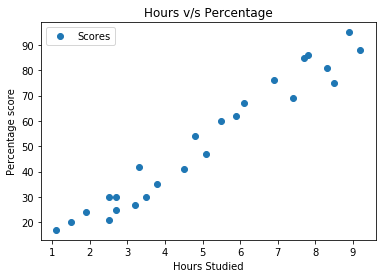

In [13]:
#plotting the distribution of the data
data.plot('Hours', 'Scores', style='o')
plt.title("Hours v/s Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage score")
plt.show()

In [14]:
#Graph shows positive relations between number of hours studeied and percentage

In [20]:
#Preparing data
x= data.iloc[:,:-1].values
y= data.iloc[:, 1].values

In [22]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [29]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


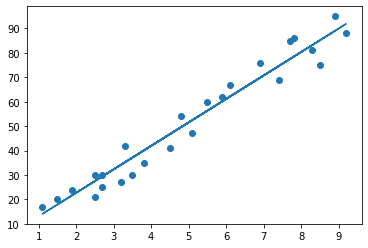

In [32]:
#Plotting the regression line
line= regressor.coef_*x+regressor.intercept_

#Plptting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [33]:
#now we have trained tour algorithm. we can now make prediction
print(x_test)
y_pred = regressor.predict(x_test)


[[5.5]
 [8.9]
 [3.8]
 [9.2]
 [2.7]]


In [34]:
#comparing Actual vs Predictive
df = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
df

,Actual,Predicted
0,60,56.312580
1,95,88.992003
2,35,39.972869
3,88,91.875482
4,25,29.400114


In [43]:
#now we can test with our own data
#what will be the predicted score if a student study for 9.25 hours in a day?
hours = 9.25
pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))


No of Hours = 9.25
Predicted Score = 92.35606168784807


In [47]:
#Evaluating the model
#R-squared import metrics
from sklearn import metrics
print('R-squared',metrics.r2_score(y_test,y_pred))
print('mean absolute error',metrics.mean_absolute_error(y_test,y_pred))

R-squared 0.9717922648448573
mean absolute error 4.588776238754818
